# Plot Scores for Columns of MSA

## Import and Clean Data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

# remove to see copy warning in second box
warnings.filterwarnings("ignore", module="pandas")

infile = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR43553\P33941_ortholog_msa_scores.data"

df = pd.read_csv(infile)

In [2]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes
#df_clean.head()

213 columns used in analysis.



Identity                          object
Percent Identity                 float64
Avg Blosum62 Score               float64
Avg Frequency Score              float64
Avg Expected Frequency Score     float64
Log Avg Frequency Score Ratio    float64
Avg Frequency Ratio              float64
Avg Expected Frequency Ratio     float64
Relative Difference              float64
Difference                       float64
Fraction Aligned                 float64
Fraction Disordered              float64
Avg Disorder Strength            float64
dtype: object

## Distributions of Each Score

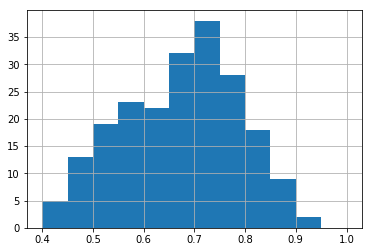

In [4]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

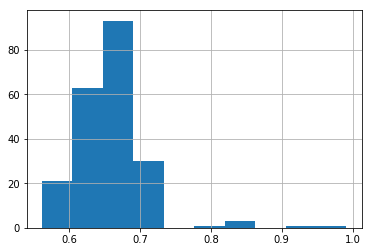

In [5]:
df_clean['Avg Expected Frequency Score'].hist();

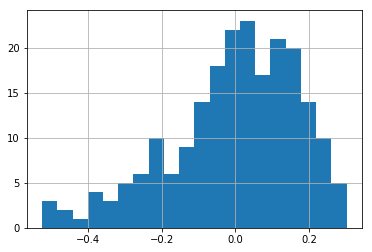

In [6]:
df_clean['Log Avg Frequency Score Ratio'].hist(bins = 20);

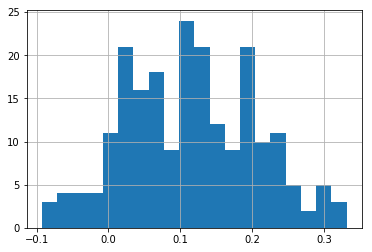

In [7]:
df_clean['Avg Frequency Ratio'].hist(bins = 20);

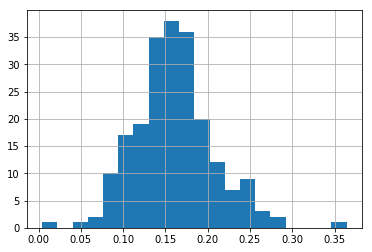

In [9]:
df_clean['Avg Expected Frequency Ratio'].hist(bins = 20);

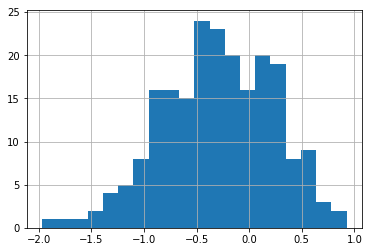

In [10]:
df_clean['Relative Difference'].hist(bins = 20);

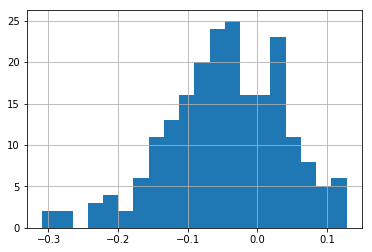

In [11]:
df_clean['Difference'].hist(bins = 20);

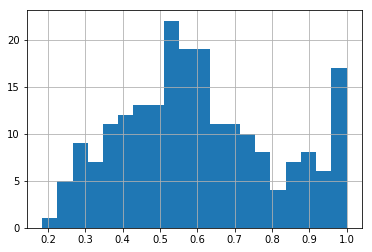

In [12]:
df_clean['Percent Identity'].hist(bins = 20);

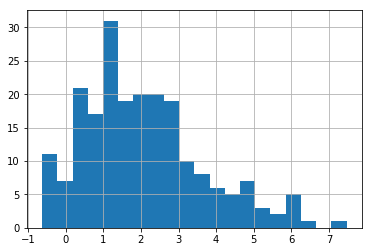

In [13]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

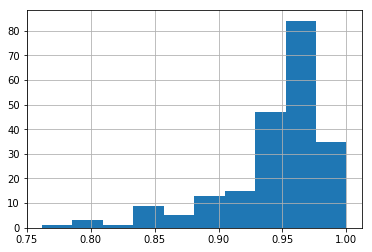

In [14]:
df_clean['Fraction Aligned'].hist();

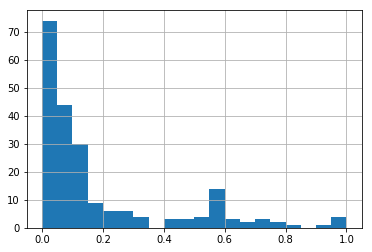

In [15]:
df_clean['Fraction Disordered'].hist(bins = 20);

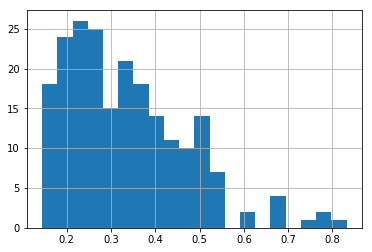

In [16]:
df_clean['Avg Disorder Strength'].hist(bins = 20);

Sanity Checks

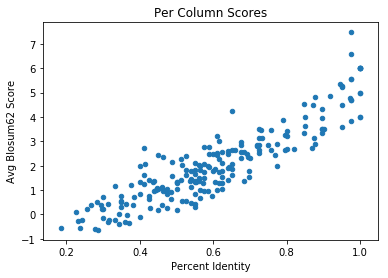

In [17]:
df_clean.plot.scatter('Percent Identity', 'Avg Blosum62 Score', title='Per Column Scores');

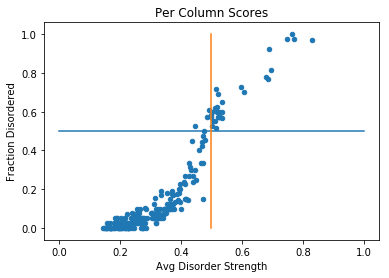

In [18]:
df_clean.plot.scatter('Avg Disorder Strength', 'Fraction Disordered', title='Per Column Scores')
plt.plot([0.5,0.5])
plt.plot([0.5,0.5],[0,1]);

very few columns scored differently by soft and hard scores splitting at 50% (so only making 50% split graphs for 1 score)

## Plot Column Scores

y=1.141080x+(-0.084918)


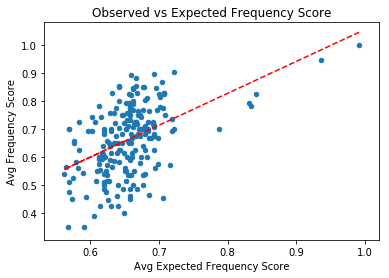

In [16]:
df_clean.plot.scatter("Avg Expected Frequency Score", "Avg Frequency Score", title="Observed vs Expected Frequency Score")
#plt.plot([0.5,1], [0.5,1])

x = df_clean["Avg Expected Frequency Score"]
y = df_clean["Avg Frequency Score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")
print(f"y={z[0]:.6f}x+({z[1]:.6f})");

y=0.741374x+(-0.004643)


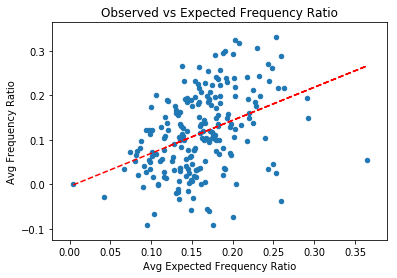

In [17]:
df_clean.plot.scatter("Avg Expected Frequency Ratio", "Avg Frequency Ratio", title="Observed vs Expected Frequency Ratio")
#plt.plot([0,0.6], [0,0.6])
# r2 trendline
x = df_clean["Avg Expected Frequency Ratio"]
y = df_clean["Avg Frequency Ratio"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")
print(f"y={z[0]:.6f}x+({z[1]:.6f})");

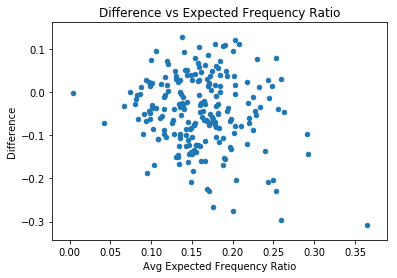

In [21]:
df_clean.plot.scatter("Avg Expected Frequency Ratio", "Difference", title="Difference vs Expected Frequency Ratio");

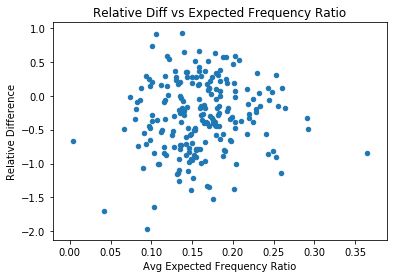

In [22]:
df_clean.plot.scatter("Avg Expected Frequency Ratio", "Relative Difference", title="Relative Diff vs Expected Frequency Ratio");

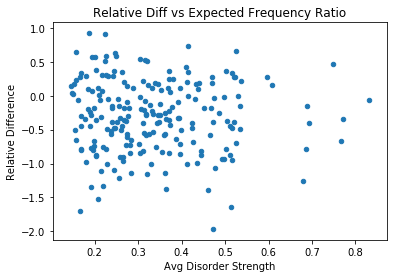

In [23]:
df_clean.plot.scatter("Avg Disorder Strength", "Relative Difference", title="Relative Diff vs Expected Frequency Ratio");

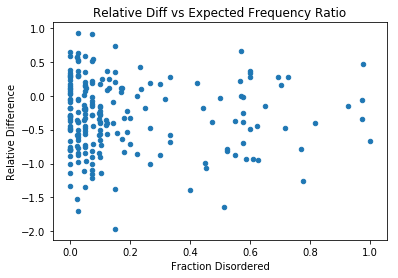

In [24]:
df_clean.plot.scatter("Fraction Disordered", "Relative Difference", title="Relative Diff vs Expected Frequency Ratio");

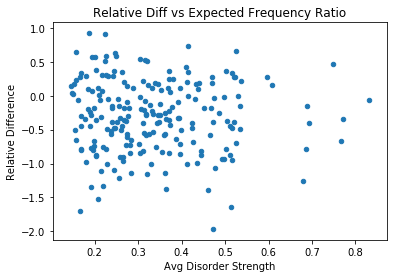

In [25]:
df_clean.plot.scatter("Avg Disorder Strength", "Relative Difference", title="Relative Diff vs Expected Frequency Ratio");

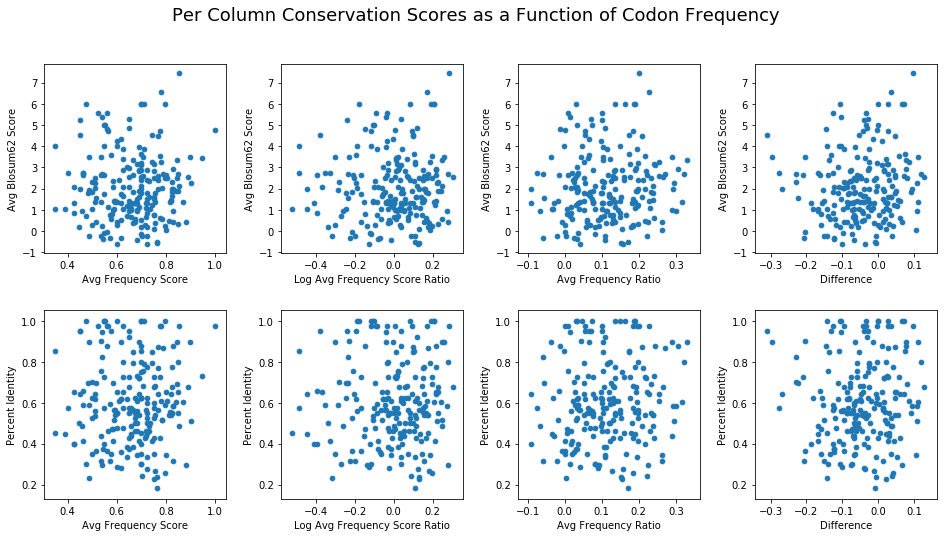

In [61]:
# each array is a row; figsize=(width,height)
fig, ([ax1,ax2, ax3,ax4], [ax5,ax6, ax7,ax8]) = plt.subplots(2, 4, sharex='col', figsize=(16,8), 
                                                                 subplot_kw={'xlabel':"Avg Frequency Score"})

fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)


ax1.scatter(df_clean['Avg Frequency Score'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set_ylabel('Avg Blosum62 Score')

ax5.scatter(df_clean['Avg Frequency Score'], df_clean['Percent Identity'], s=22)
ax5.set_ylabel('Percent Identity')

ax2.scatter(df_clean['Log Avg Frequency Score Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax2.set(xlabel='Log Avg Frequency Score Ratio', ylabel='Avg Blosum62 Score')

ax6.scatter(df_clean['Log Avg Frequency Score Ratio'], df_clean['Percent Identity'], s=22)
ax6.set(xlabel='Log Avg Frequency Score Ratio', ylabel='Percent Identity')

ax3.scatter(df_clean['Avg Frequency Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax3.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score')

ax7.scatter(df_clean['Avg Frequency Ratio'], df_clean['Percent Identity'], s=22)
ax7.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity')

ax4.scatter(df_clean['Difference'], df_clean['Avg Blosum62 Score'], s=22)
ax4.set(xlabel='Difference', ylabel='Avg Blosum62 Score')

ax8.scatter(df_clean['Difference'], df_clean['Percent Identity'], s=22)
ax8.set(xlabel='Difference', ylabel='Percent Identity')

for ax in fig.axes:
        ax.xaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);


What differences are observed between the four different frequency scores used?

## Fraction Disorder Split at 50% for same scores above

In [22]:
# initialize dataframes split at 50% disorder
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

Need to set scales for each score to the same; ignore for now... use individuals below

Also not enough space for log avg freq score ratio

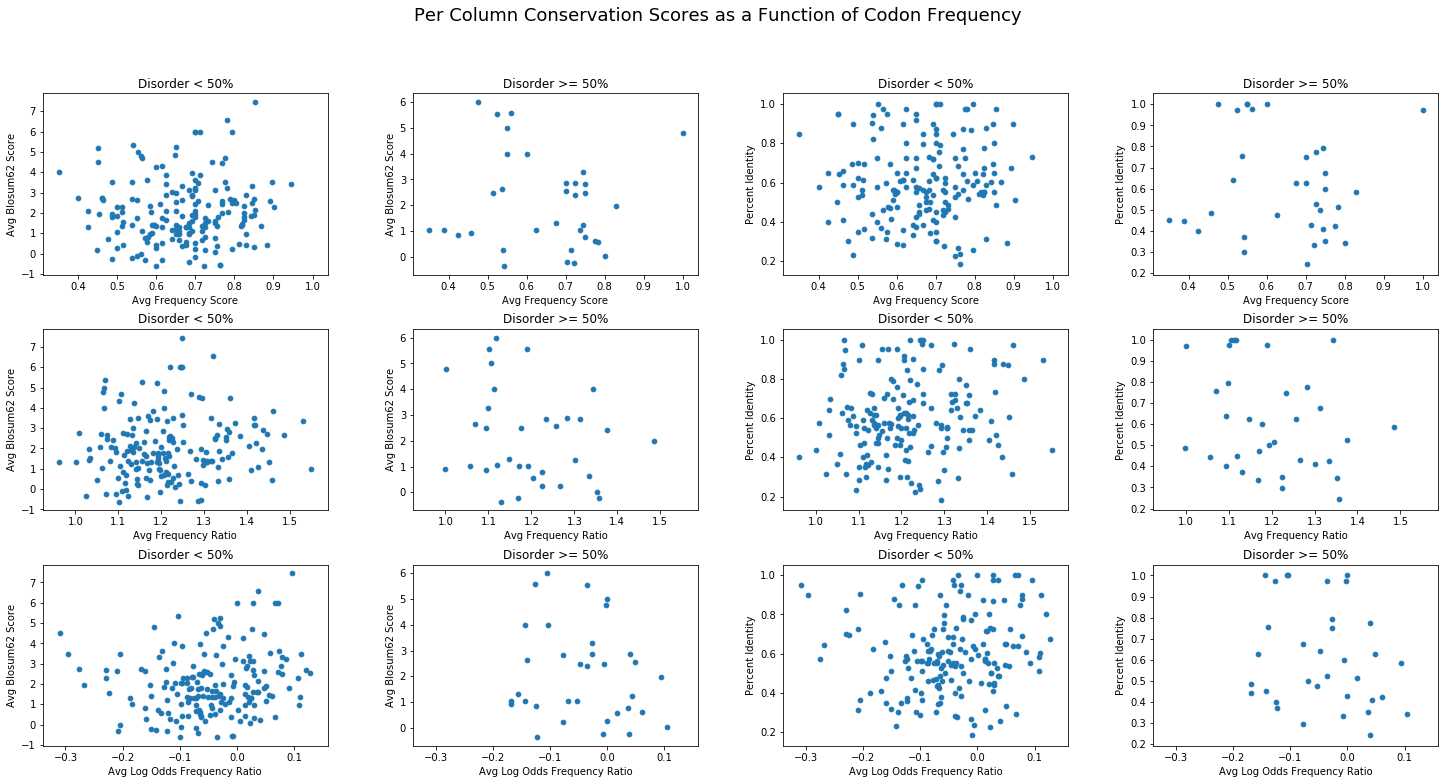

In [27]:
# old... keep for code

# make 2 subplots share yaxis? get all blossum share and all pecent id share?
fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8], [ax9,ax10,ax11,ax12]) = plt.subplots(3, 4, sharex='row', figsize=(25,12), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq score
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# freq ratio
ax5.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax7.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax8.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder >= 50%')

# avg log odds freq
ax9.scatter(df_clean_dis1['Avg Log Odds Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax9.set(xlabel="Avg Log Odds Frequency Ratio", ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax10.scatter(df_clean_dis2['Avg Log Odds Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax10.set(xlabel="Avg Log Odds Frequency Ratio", ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax11.scatter(df_clean_dis1['Avg Log Odds Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax11.set(xlabel="Avg Log Odds Frequency Ratio", ylabel='Percent Identity', title='Disorder < 50%')

ax12.scatter(df_clean_dis2['Avg Log Odds Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax12.set(xlabel="Avg Log Odds Frequency Ratio", ylabel='Percent Identity', title='Disorder >= 50%')

fig.subplots_adjust(hspace=0.3, wspace=0.3);

Plotting each individual frequency score against consv. with split

In [70]:
def plot_consv_scatters(column_name):

    fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, sharex=True, sharey ='row', figsize=(10,8), 
                                               subplot_kw={'xlabel':column_name})
    fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

    # freq score
    ax1.scatter(df_clean_dis1[column_name], df_clean_dis1['Avg Blosum62 Score'], s=22)
    ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

    ax2.scatter(df_clean_dis2[column_name], df_clean_dis2['Avg Blosum62 Score'], s=22)
    ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


    ax3.scatter(df_clean_dis1[column_name], df_clean_dis1['Percent Identity'], s=22)
    ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

    ax4.scatter(df_clean_dis2[column_name], df_clean_dis2['Percent Identity'], s=22)
    ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


    # turn on axis tick labels even though axis is shared
    for ax in fig.axes:
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)

    fig.subplots_adjust(hspace=0.3, wspace=0.3);

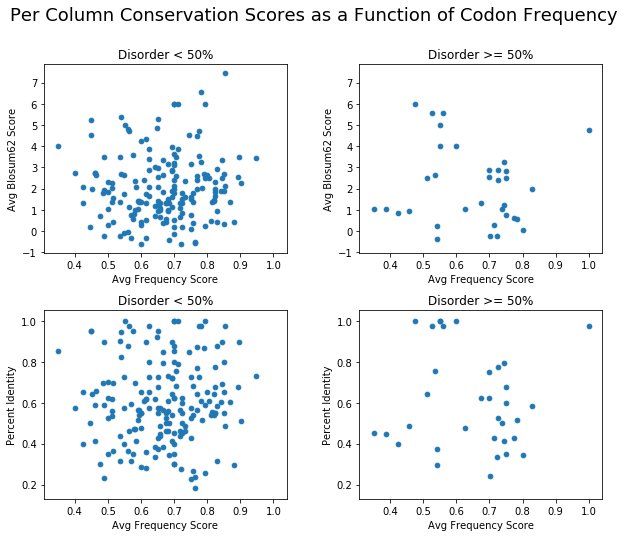

In [71]:
plot_consv_scatters("Avg Frequency Score")

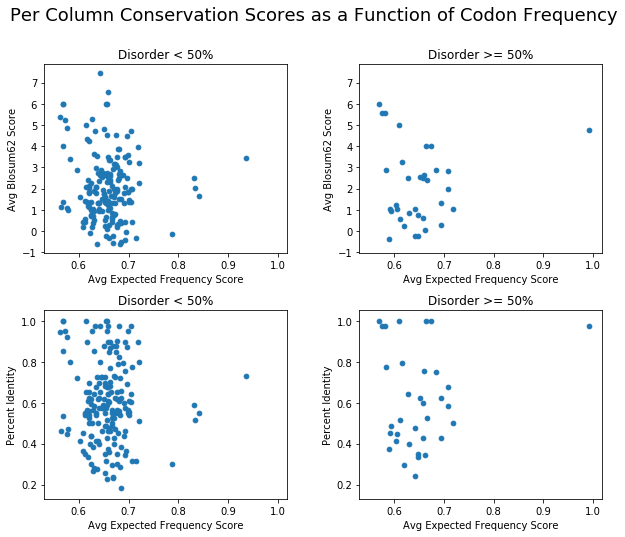

In [72]:
plot_consv_scatters("Avg Expected Frequency Score")

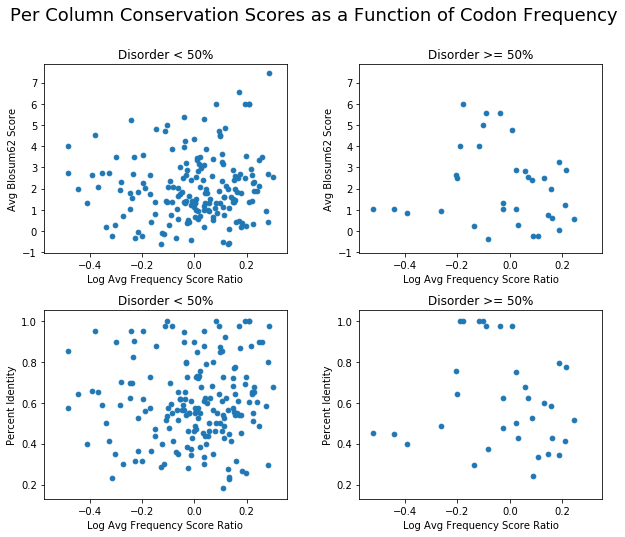

In [73]:
plot_consv_scatters('Log Avg Frequency Score Ratio')

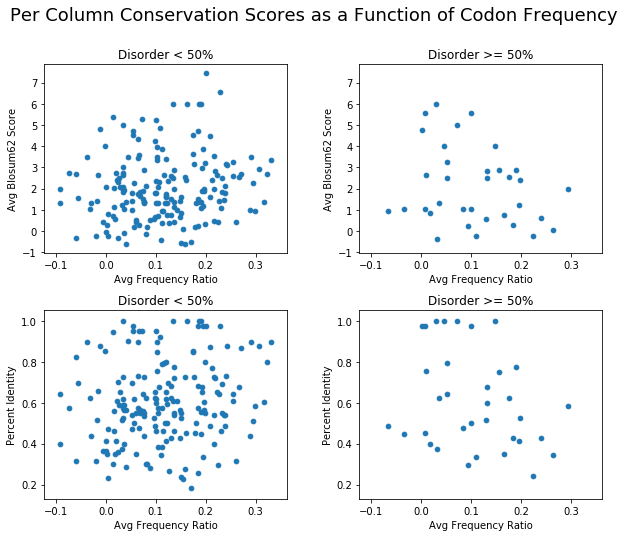

In [74]:
plot_consv_scatters('Avg Frequency Ratio')

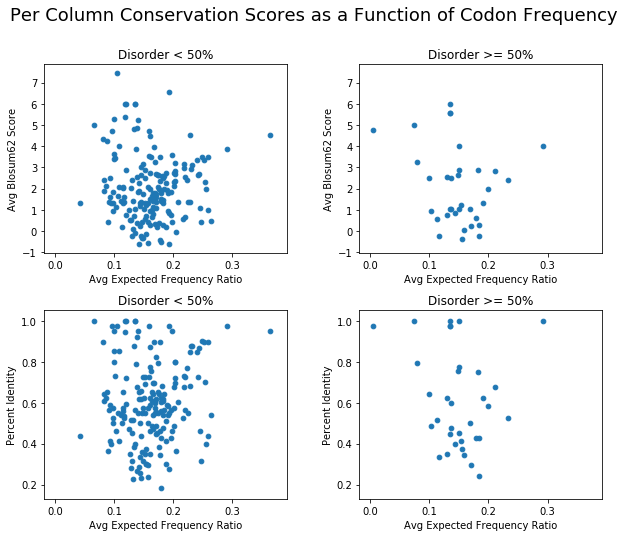

In [75]:
plot_consv_scatters('Avg Expected Frequency Ratio')

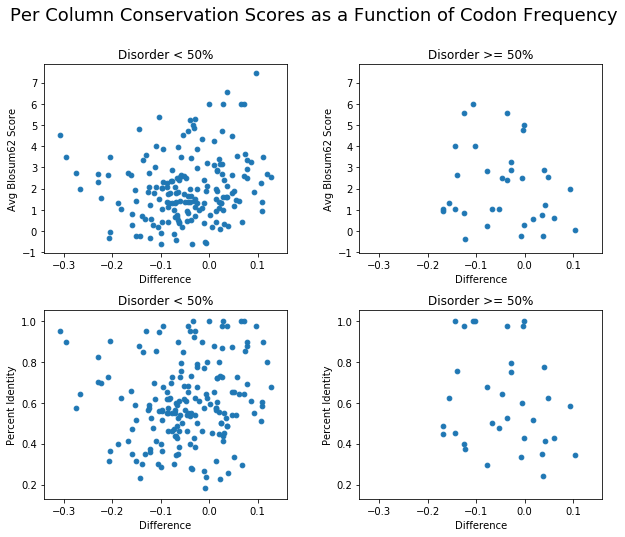

In [76]:
plot_consv_scatters('Difference')

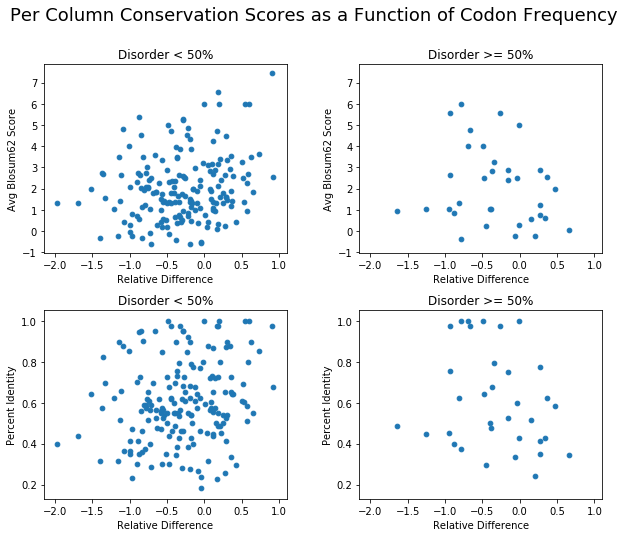

In [77]:
plot_consv_scatters('Relative Difference')

## Split at 50% Disorder Strength hardly changes anything as expected since vsl2 splits at 50% strength for labeling disorder or order

Reinforces graph from earlier

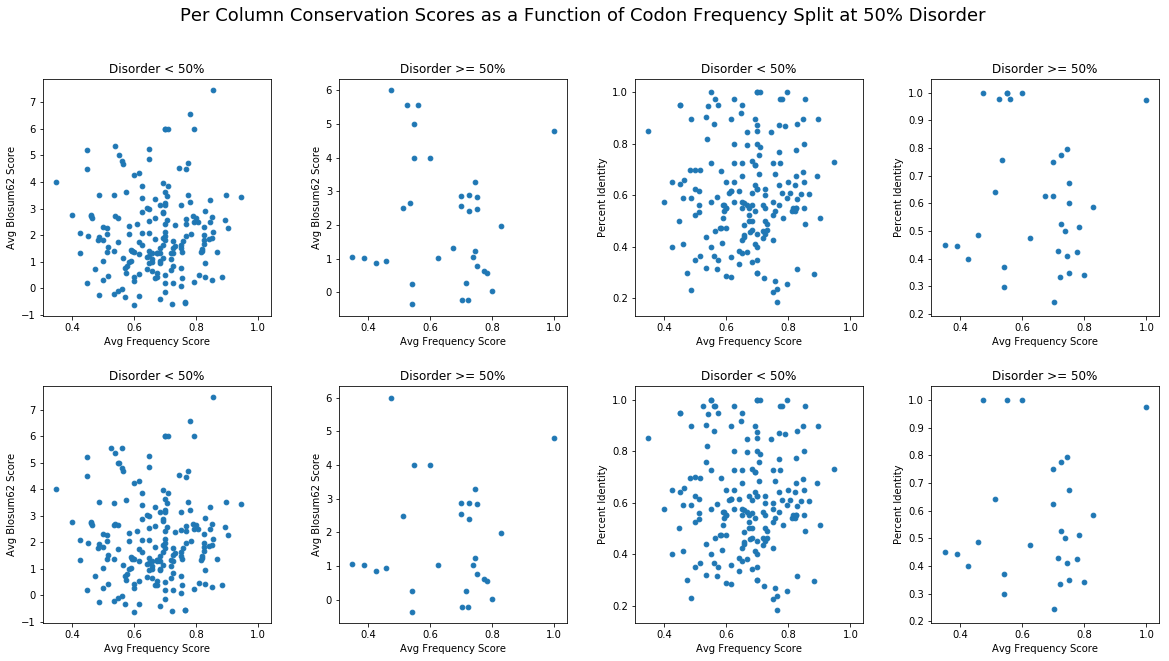

In [37]:
df_clean_dis3 = df_clean[df_clean['Avg Disorder Strength'] < 0.5]
df_clean_dis4 = df_clean[df_clean['Avg Disorder Strength'] >= 0.5]

fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency Split at 50% Disorder", fontsize=18)

# Fraction Disorder
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# Disorder Strength
ax5.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Avg Blosum62 Score'], s=22)
ax5.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Avg Blosum62 Score'], s=22)
ax6.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Percent Identity'], s=22)
ax7.set(ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Percent Identity'], s=22)
ax8.set(ylabel='Percent Identity', title='Disorder >= 50%')


fig.subplots_adjust(hspace=0.3, wspace=0.3);

# Filter by Fraction Aligned

In [38]:
print(min(df_clean['Fraction Aligned']))

0.7619047619047619


In [39]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Expected Frequency Ratio,Relative Difference,Difference,Fraction Aligned,Fraction Disordered,Avg Disorder Strength


In [40]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Expected Frequency Ratio,Relative Difference,Difference,Fraction Aligned,Fraction Disordered,Avg Disorder Strength


In [41]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Expected Frequency Ratio,Relative Difference,Difference,Fraction Aligned,Fraction Disordered,Avg Disorder Strength


In [42]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Expected Frequency Ratio,Relative Difference,Difference,Fraction Aligned,Fraction Disordered,Avg Disorder Strength
0,M,0.972973,4.783784,1.000000,0.991267,0.008772,0.001439,0.004243,-0.660742,-0.002803,0.880952,1.000000,0.765978
903,E,0.794872,3.272605,0.743590,0.616390,0.187609,0.052547,0.079794,-0.341471,-0.027247,0.928571,0.974359,0.771834
913,V,0.585366,1.979268,0.829268,0.707410,0.158933,0.293471,0.199789,0.468906,0.093682,0.976190,0.975610,0.748989
914,R,0.525000,2.402564,0.725000,0.665328,0.085891,0.198264,0.233773,-0.151895,-0.035509,0.952381,0.925000,0.688159
915,D,0.350000,0.770513,0.750000,0.647843,0.146425,0.166138,0.130023,0.277752,0.036114,0.952381,0.725000,0.596688
994,V,0.675000,2.834615,0.750000,0.708869,0.056403,0.132835,0.210528,-0.369040,-0.077693,0.952381,0.550000,0.504462
995,S,0.350000,0.285897,0.500000,0.676290,-0.302014,0.001637,0.161304,-0.989854,-0.159668,0.952381,0.450000,0.434419
996,Y,0.650000,4.252564,0.600000,0.621119,-0.034593,0.097953,0.087624,0.117875,0.010329,0.952381,0.175000,0.369863
997,R,0.550000,1.362821,0.600000,0.653252,-0.085033,0.136645,0.224546,-0.391461,-0.087901,0.952381,0.100000,0.347794
998,P,0.600000,1.769231,0.725000,0.690929,0.048134,0.100748,0.168922,-0.403584,-0.068174,0.952381,0.100000,0.344442


## Distribution of Each Score Split at 50% Fraction Disorder

Don't use this below block atm

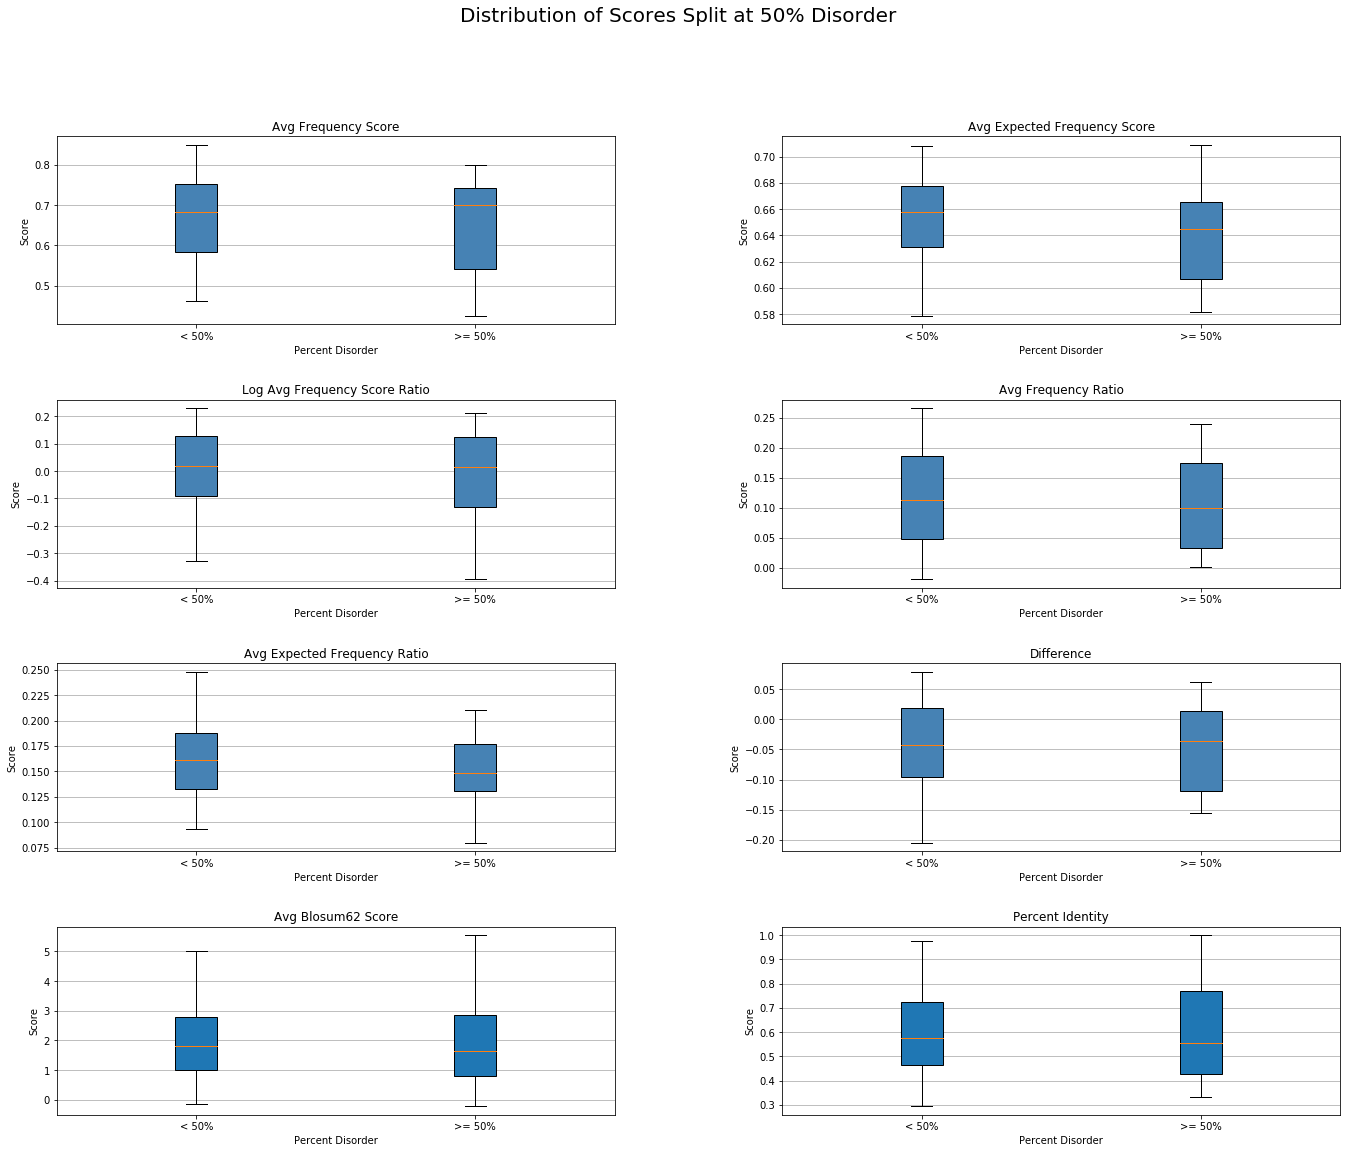

In [23]:
# old... keep for code

fig, ([ax1,ax2], [ax3,ax4], [ax5,ax6], [ax7,ax8]) = plt.subplots(4, 2, figsize=(23,18), subplot_kw={'xlabel':"Percent Disorder", 'ylabel': 'Score'})
fig.suptitle("Distribution of Scores Split at 50% Disorder", fontsize=20)

color = "steelblue"
ax1.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax1.set(title="Avg Frequency Score")

ax2.boxplot([df_clean_dis1["Avg Expected Frequency Score"], df_clean_dis2["Avg Expected Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax2.set(title="Avg Expected Frequency Score")


ax3.boxplot([df_clean_dis1["Log Avg Frequency Score Ratio"], df_clean_dis2["Log Avg Frequency Score Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax3.set(title="Log Avg Frequency Score Ratio")
            
ax4.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax4.set(title="Avg Frequency Ratio")
            
            
            
ax5.boxplot([df_clean_dis1["Avg Expected Frequency Ratio"], df_clean_dis2["Avg Expected Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax5.set(title="Avg Expected Frequency Ratio")

ax6.boxplot([df_clean_dis1["Difference"], df_clean_dis2["Difference"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax6.set(title="Difference")
            

ax7.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax7.set(title="Avg Blosum62 Score")

ax8.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax8.set(title="Percent Identity")


for ax in fig.axes:
    ax.set_xticklabels(["< 50%", ">= 50%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, axis='y')
    

fig.subplots_adjust(hspace=0.4, wspace=0.3);

In [43]:
def plot_boxplot(column_name):
    '''
    Plots 1 boxplot with 2 boxes split by 50% Disorder
    '''
    plt.figure(figsize=(10, 5)) # shrink later if wanted
    plt.grid(True, axis='y')

    # example of how to set each box same color
    color = "steelblue"
    boxplot = plt.boxplot([df_clean_dis1[column_name], df_clean_dis2[column_name]], whis=[5, 95], showfliers=False,
                          patch_artist=True, boxprops=dict(facecolor=color, color="black"))

    
    # get medians to be used for locations
    medians = []
    for medline in boxplot['medians']:
        linedata = medline.get_ydata()
        median = linedata[0]
        medians.append(median)

    plt.xticks([1,2], ["< 50%", ">= 50%"])
    #plt.yticks(fontsize=12)
    plt.ylabel(column_name, fontsize=15)
    plt.xlabel('Percent Disorder', fontsize=15)
    plt.title(column_name + ' Distribution Split at 50% Disorder', fontsize=18)
    
    
    nobs = [len(df_clean_dis1), len(df_clean_dis2)]
    nobs = ['n: ' + str(num) for num in nobs]
    pos = range(len(nobs))
    yticks = plt.yticks()[0]
    spacer = abs(yticks[1] - yticks[2]) * 0.1
    for tick in pos:
        plt.text(pos[tick]+1, medians[tick] + spacer, nobs[tick],
        horizontalalignment='center', size='medium', color='w', weight='semibold');
    
    

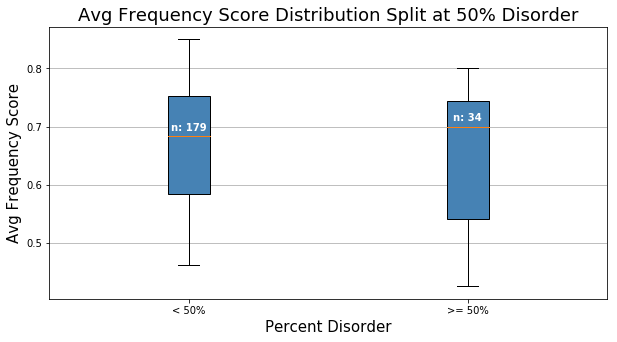

In [44]:
plot_boxplot("Avg Frequency Score");

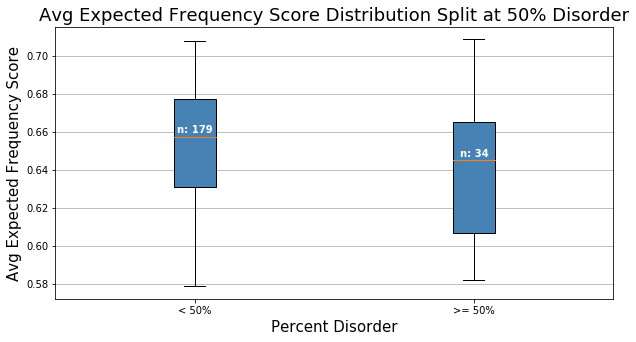

In [45]:
plot_boxplot("Avg Expected Frequency Score");

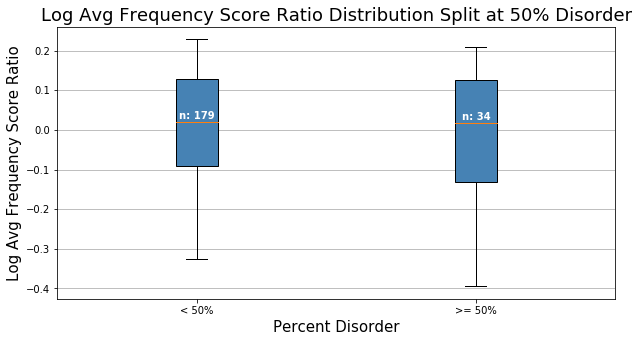

In [46]:
plot_boxplot("Log Avg Frequency Score Ratio");

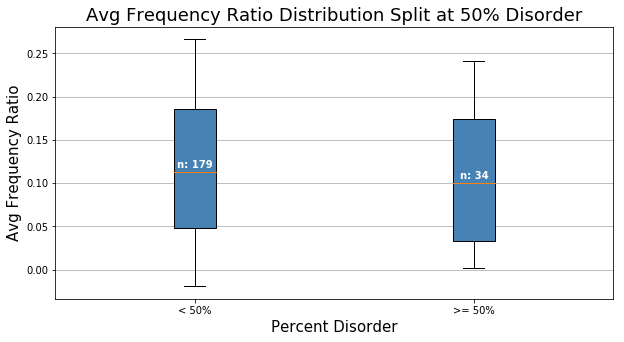

In [47]:
plot_boxplot("Avg Frequency Ratio");

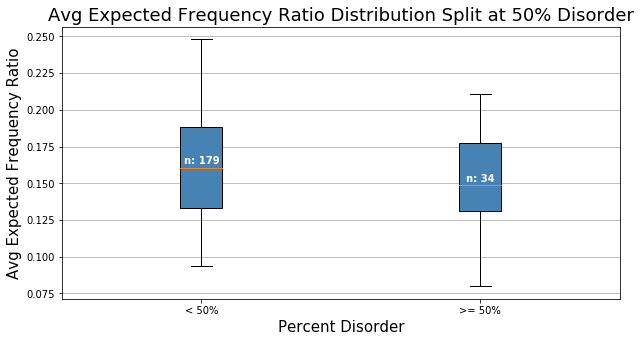

In [48]:
plot_boxplot("Avg Expected Frequency Ratio");

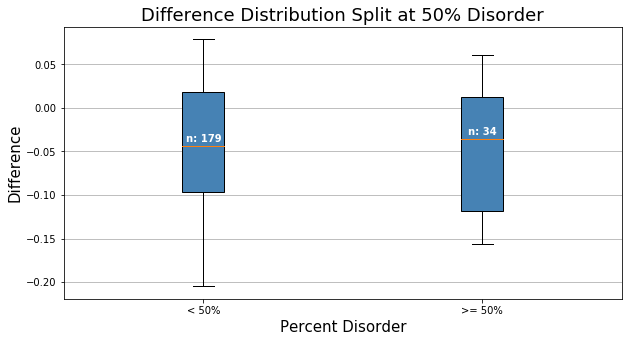

In [55]:
plot_boxplot("Difference");

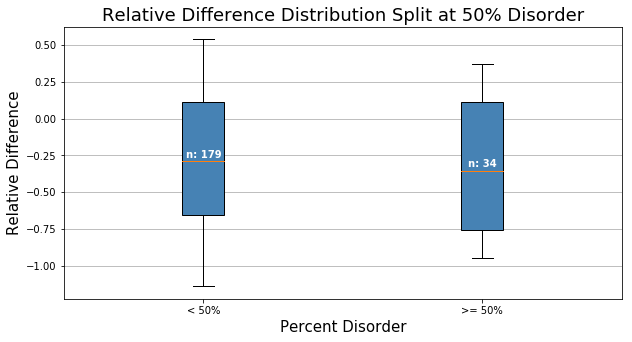

In [54]:
plot_boxplot("Relative Difference");

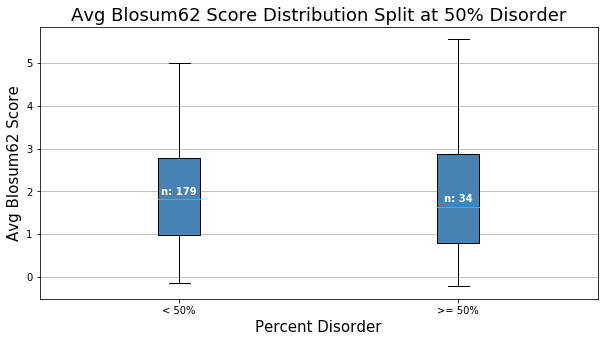

In [51]:
plot_boxplot('Avg Blosum62 Score');

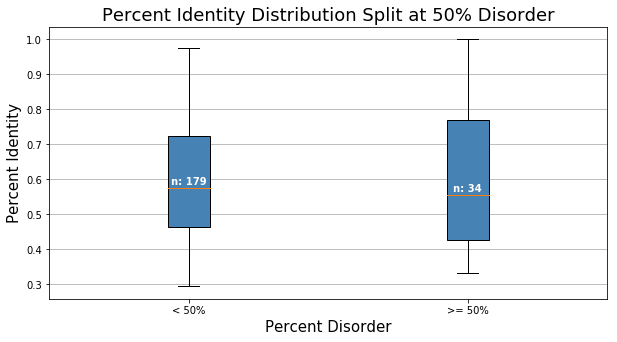

In [52]:
plot_boxplot('Percent Identity');

## Plot Column Scores as a Function of Disorder

To get a general sense of how scores differ based on which disorder score is used

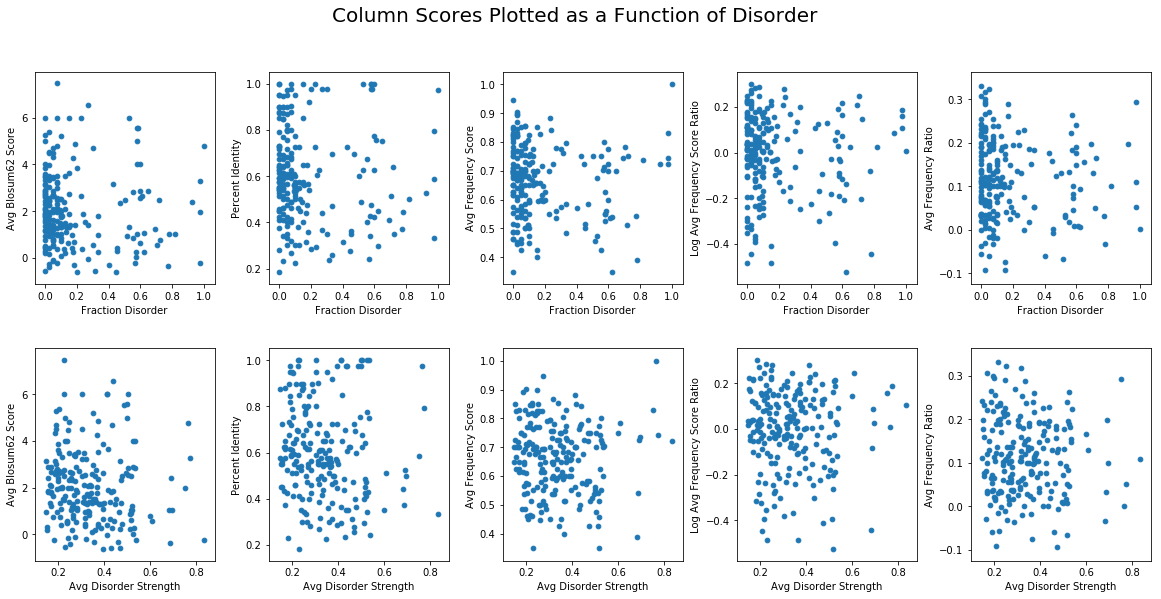

In [56]:
fig, ([ax1,ax2,ax3,ax4,ax5], [ax6,ax7,ax8,ax9,ax10]) = plt.subplots(2, 5, figsize=(20,9), sharex='row', sharey='col')

fig.suptitle("Column Scores Plotted as a Function of Disorder", fontsize=20)

# fraction disordered
ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(xlabel='Fraction Disorder', ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Fraction Disordered'], df_clean['Percent Identity'], s=22)
ax2.set(xlabel='Fraction Disorder', ylabel='Percent Identity')

ax3.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score'], s=22)
ax3.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Fraction Disordered'], df_clean['Log Avg Frequency Score Ratio'], s=22)
ax4.set(xlabel='Fraction Disorder', ylabel='Log Avg Frequency Score Ratio')

ax5.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Ratio'], s=22)
ax5.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Ratio')

# avg disorder strength
ax6.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Avg Disorder Strength', ylabel='Avg Blosum62 Score')

ax7.scatter(df_clean['Avg Disorder Strength'], df_clean['Percent Identity'], s=22)
ax7.set(xlabel='Avg Disorder Strength', ylabel='Percent Identity')

ax8.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score'], s=22)
ax8.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Score')

ax9.scatter(df_clean['Avg Disorder Strength'], df_clean['Log Avg Frequency Score Ratio'], s=22)
ax9.set(xlabel='Avg Disorder Strength', ylabel='Log Avg Frequency Score Ratio')

ax10.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Ratio'], s=22)
ax10.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Ratio')

fig.subplots_adjust(hspace=0.3, wspace=0.3);

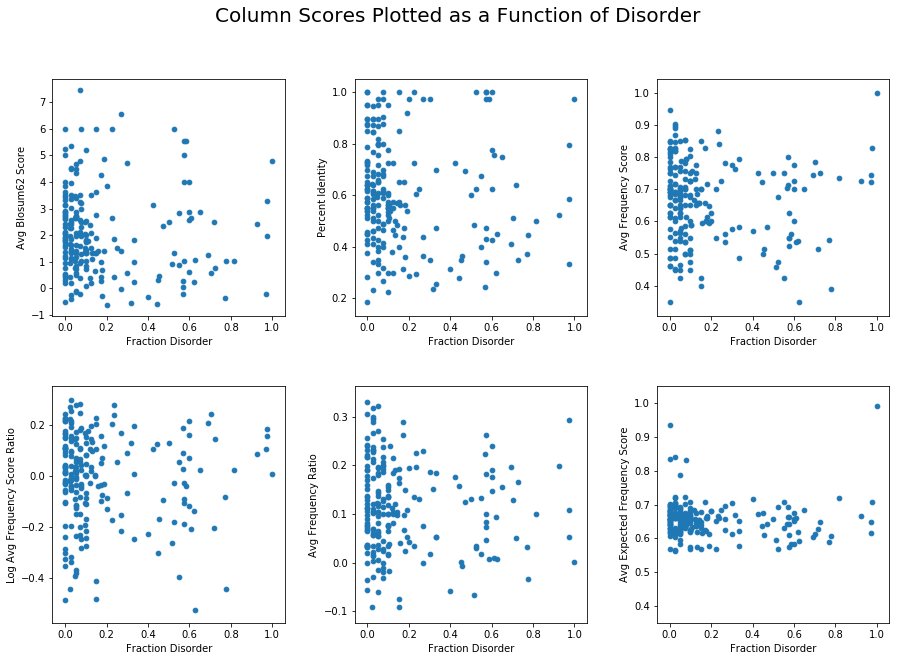

In [57]:
# fraction disordered
fig, ([ax1,ax2,ax3], [ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(15,10), sharex=True, subplot_kw={'xlabel':"Fraction Disorder"})

fig.suptitle("Column Scores Plotted as a Function of Disorder", fontsize=20)


ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Fraction Disordered'], df_clean['Percent Identity'], s=22)
ax2.set(ylabel='Percent Identity')

ax3.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score'], s=22)
ax3.set(ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Fraction Disordered'], df_clean['Log Avg Frequency Score Ratio'], s=22)
ax4.set(ylabel='Log Avg Frequency Score Ratio')

ax5.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Ratio'], s=22)
ax5.set(ylabel='Avg Frequency Ratio')

ax6.scatter(df_clean['Fraction Disordered'], df_clean['Avg Expected Frequency Score'], s=22)
ax6.set(ylabel='Avg Expected Frequency Score', ylim=[0.35,1.05])

for ax in fig.axes:
    ax.xaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);

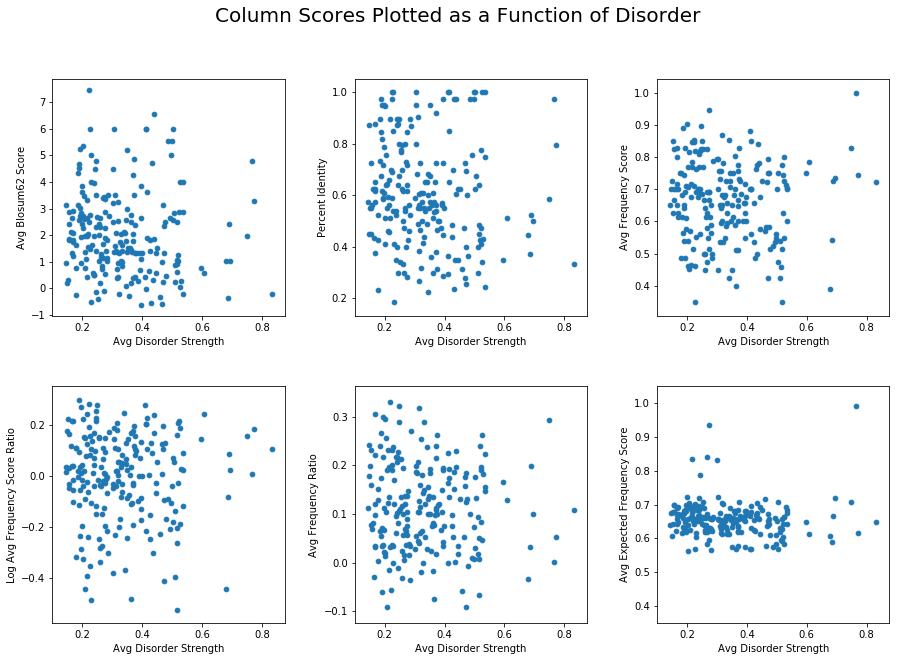

In [58]:
# Avg Disorder Strength
fig, ([ax1,ax2,ax3], [ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(15,10), sharex=True, subplot_kw={'xlabel':"Avg Disorder Strength"})

fig.suptitle("Column Scores Plotted as a Function of Disorder", fontsize=20)


ax1.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Avg Disorder Strength'], df_clean['Percent Identity'], s=22)
ax2.set(ylabel='Percent Identity')

ax3.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score'], s=22)
ax3.set(ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Avg Disorder Strength'], df_clean['Log Avg Frequency Score Ratio'], s=22)
ax4.set(ylabel='Log Avg Frequency Score Ratio')

ax5.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Ratio'], s=22)
ax5.set(ylabel='Avg Frequency Ratio')

ax6.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Expected Frequency Score'], s=22)
ax6.set(ylabel='Avg Expected Frequency Score', ylim=[0.35,1.05])

for ax in fig.axes:
    ax.xaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);

KeyError: 'Avg Log Odds Frequency Ratio'

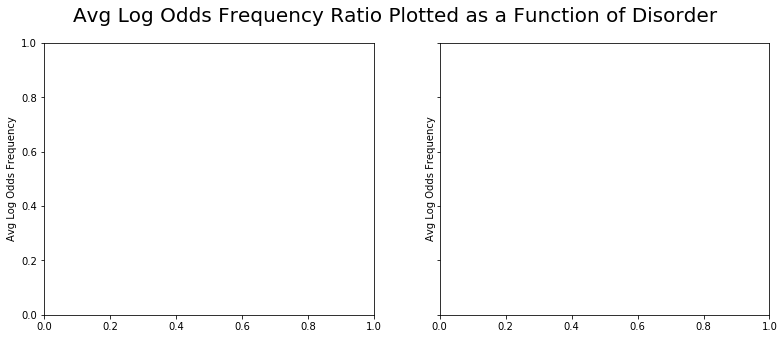

In [59]:
# old... keep for code

fig, ([ax1,ax2]) = plt.subplots(1, 2, figsize=(13,5), sharey=True, subplot_kw={'ylabel':"Avg Log Odds Frequency"})

fig.suptitle("Avg Log Odds Frequency Ratio Plotted as a Function of Disorder", fontsize=20)


ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Log Odds Frequency Ratio'], s=22)
ax1.set(xlabel="Fraction Disorder")

ax2.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Log Odds Frequency Ratio'], s=22)
ax2.set(xlabel="Avg Disorder Strength")

for ax in fig.axes:
    ax.yaxis.set_tick_params(labelbottom=True)
    
fig.subplots_adjust(hspace=0.3, wspace=0.3);

Fraction disorder seems to have more columns pressed into zero while avg strength has a larger spread

## Fraction Disorder Filters

In [24]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

164

In [25]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

16

In [26]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

25

In [27]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

8

## Disorder Strength Filters

In [28]:
df_clean_25ds = df_clean[df_clean['Avg Disorder Strength'] <= 0.25]
len(df_clean_25ds)

69

In [29]:
df_clean_50ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.50) & (df_clean['Avg Disorder Strength'] > 0.25)]
len(df_clean_50ds)

116

In [30]:
df_clean_75ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.75) & (df_clean['Avg Disorder Strength'] > 0.50)]
len(df_clean_75ds)

25

In [31]:
df_clean_100ds = df_clean[(df_clean['Avg Disorder Strength'] <= 1.0) & (df_clean['Avg Disorder Strength'] > 0.75)]
len(df_clean_100ds)

3

Clear difference in distribution of columns when split into quarters

## Boxplots for 25% disorder split 

In [42]:
def plot_boxplots(column_name):
    '''
    Expects the above dataframes to be defined.
    Plots 2 boxplots with 4 boxes split by 25% Disorder
    '''
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,7), sharey=True)
    fig.suptitle("Distribtuion of " + column_name + " Split at Every 25% Disorder", fontsize=22)
    color = "steelblue"

    data1 = ax1.boxplot([df_clean_25d[column_name], df_clean_50d[column_name], df_clean_75d[column_name], df_clean_100d[column_name]],
                whis=[5, 95], showfliers=False, patch_artist=True, boxprops=dict(facecolor=color, color="black"))


    data2 = ax2.boxplot([df_clean_25ds[column_name], df_clean_50ds[column_name], df_clean_75ds[column_name],df_clean_100ds[column_name]], 
                whis=[5, 95], showfliers=False, patch_artist=True, boxprops=dict(facecolor=color, color="black"))
    
    
    # get medians to be used for locations
    medians = []
    for bp in [data1, data2]:
        bp_meds = []
        for medline in bp['medians']:
            linedata = medline.get_ydata()
            median = linedata[0]
            bp_meds.append(median)
            
        medians.append(bp_meds)
        
    # if any df have no rows, replace nan with 0.0 for comparison later
    medians = np.nan_to_num(medians, copy=False)
    
    nobs = [[len(df_clean_25d), len(df_clean_50d), len(df_clean_75d), len(df_clean_100d)],
            [len(df_clean_25ds), len(df_clean_50ds), len(df_clean_75ds), len(df_clean_100ds)]]
    
    nobs = [['n: ' + str(num) for num in lst] for lst in nobs]
    pos = range(len(nobs[1]))    
    titles = ["Fraction Disorder", "Avg Disorder Strength"]
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelsize=15)
        ax.set_xlabel("Percent Disorder", fontsize=15)
        ax.set_ylabel(column_name, fontsize=15)
        ax.set_title(titles[i], fontsize=17.5)
        ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
        ax.grid(True, axis='y')
        
        # have float added to median adjust based on scale of y-axis
        yticks = ax.yaxis.get_ticklocs()
        spacer = abs(yticks[1] - yticks[2]) * 0.1
        for tick,label in zip(pos, ax.get_xticklabels()):
            y_coor = medians[i][tick]
            # dont want to write where there is no data... pretty obvious as is
            if y_coor == 0.0:
                continue
            ax.text(pos[tick]+1, y_coor + spacer, nobs[i][tick],
            horizontalalignment='center', size='x-large', color='w', weight='semibold');


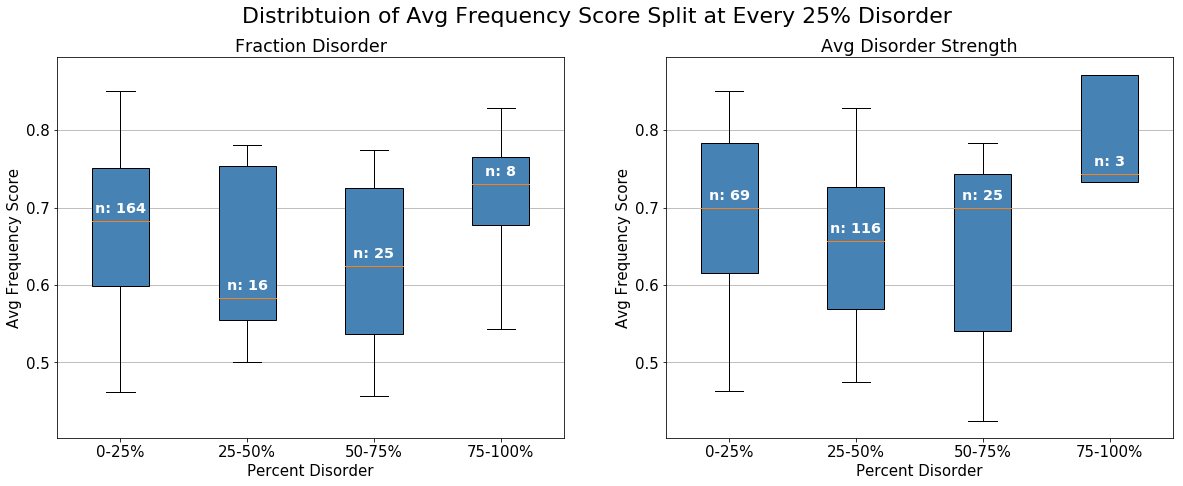

In [44]:
plot_boxplots("Avg Frequency Score")

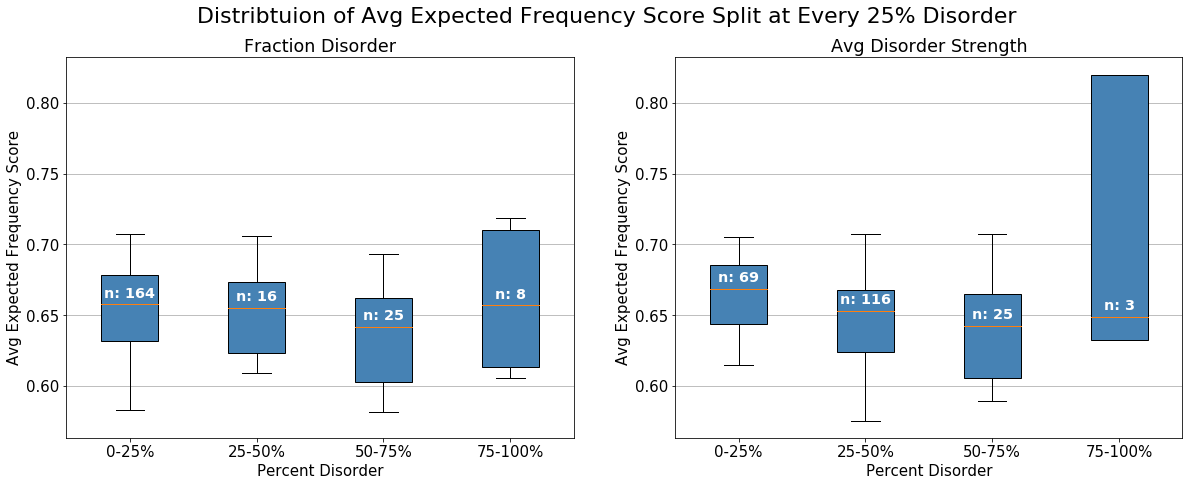

In [45]:
plot_boxplots("Avg Expected Frequency Score")

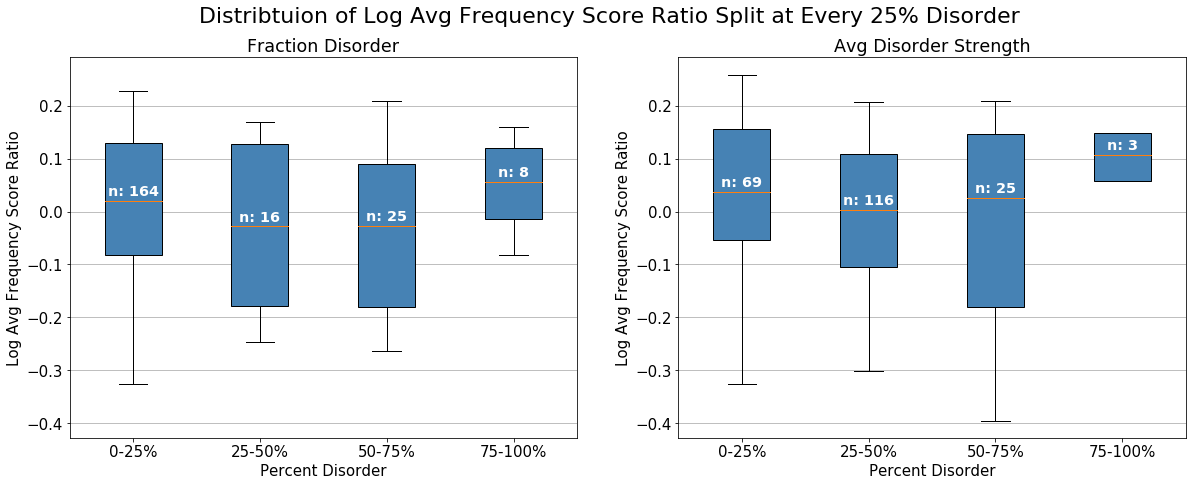

In [46]:
plot_boxplots("Log Avg Frequency Score Ratio")

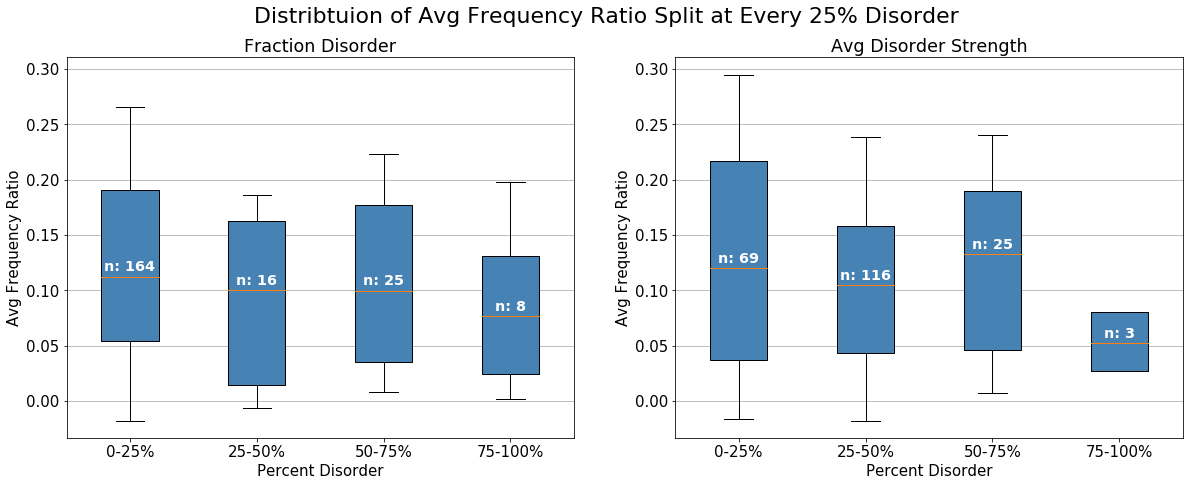

In [47]:
plot_boxplots("Avg Frequency Ratio")

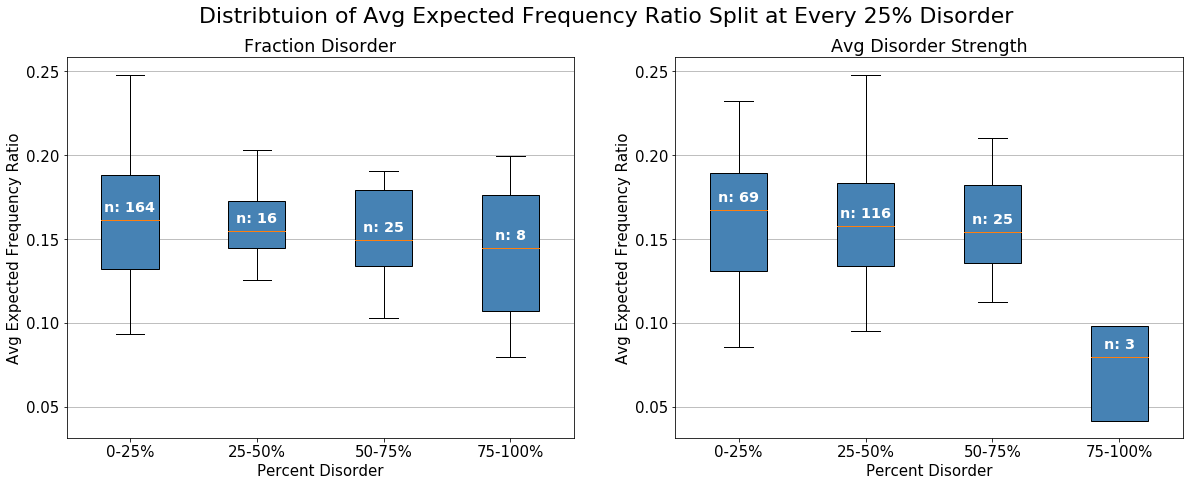

In [48]:
plot_boxplots("Avg Expected Frequency Ratio")

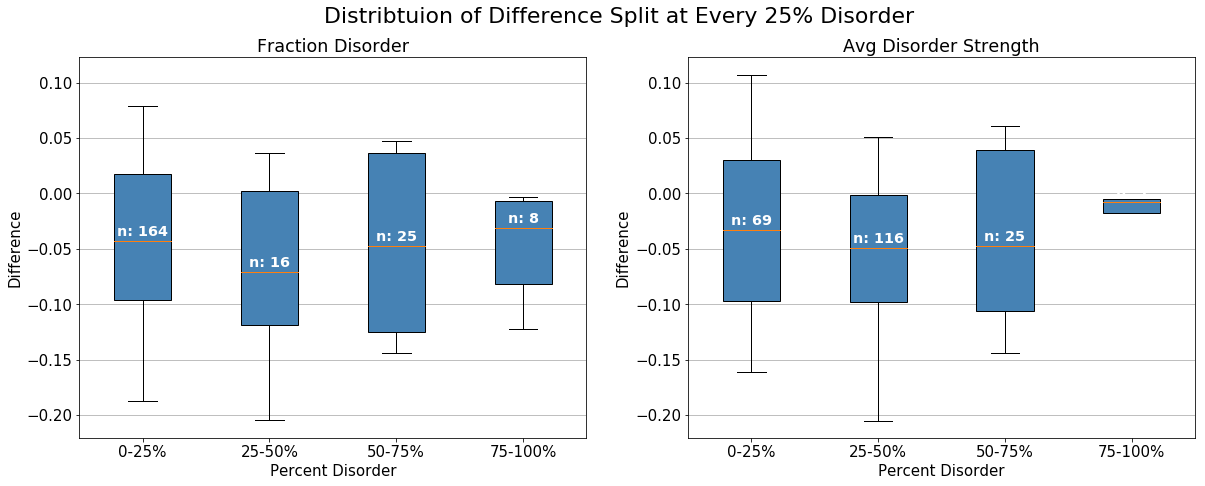

In [49]:
plot_boxplots("Difference")

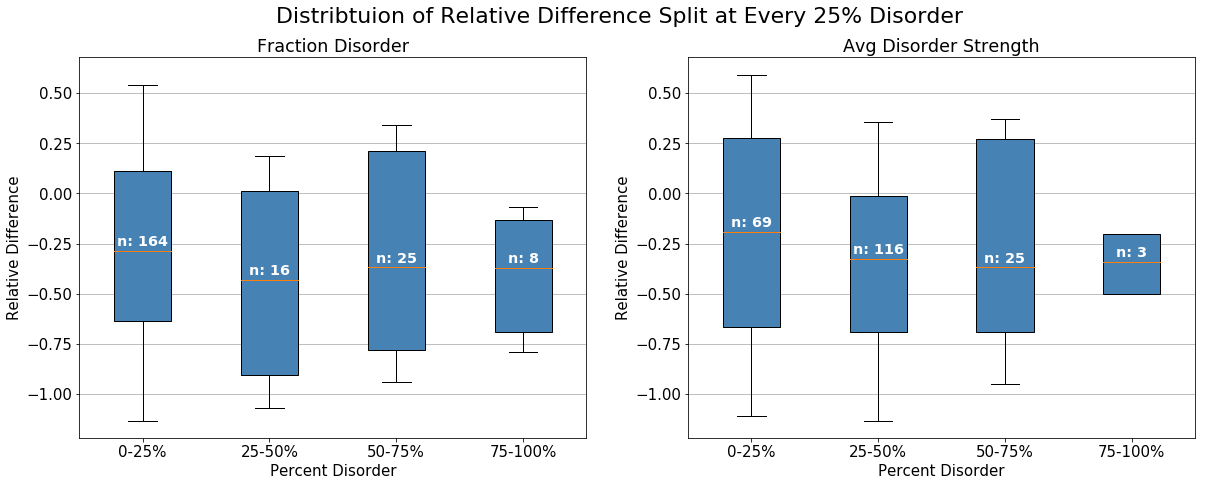

In [50]:
plot_boxplots("Relative Difference")

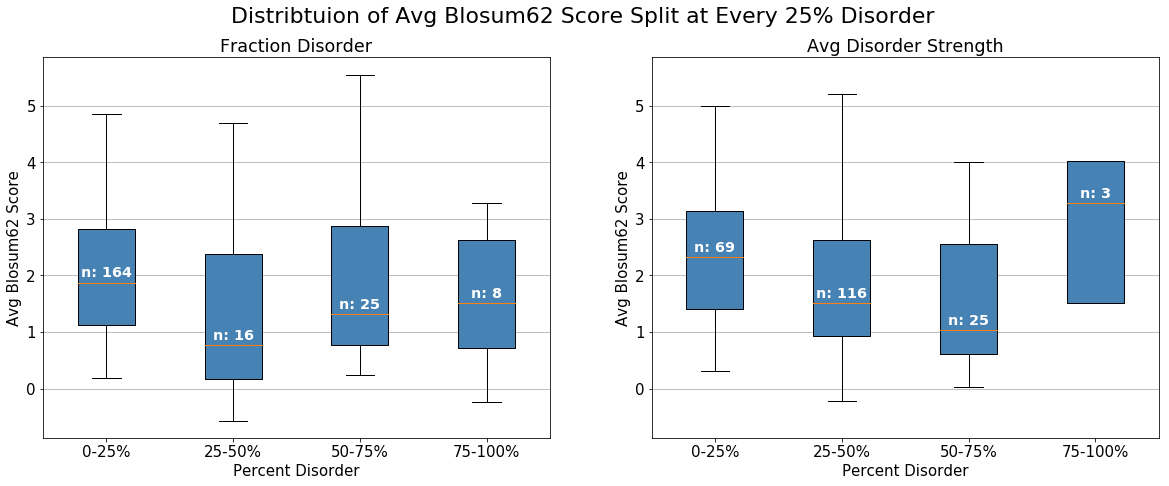

In [51]:
plot_boxplots("Avg Blosum62 Score")

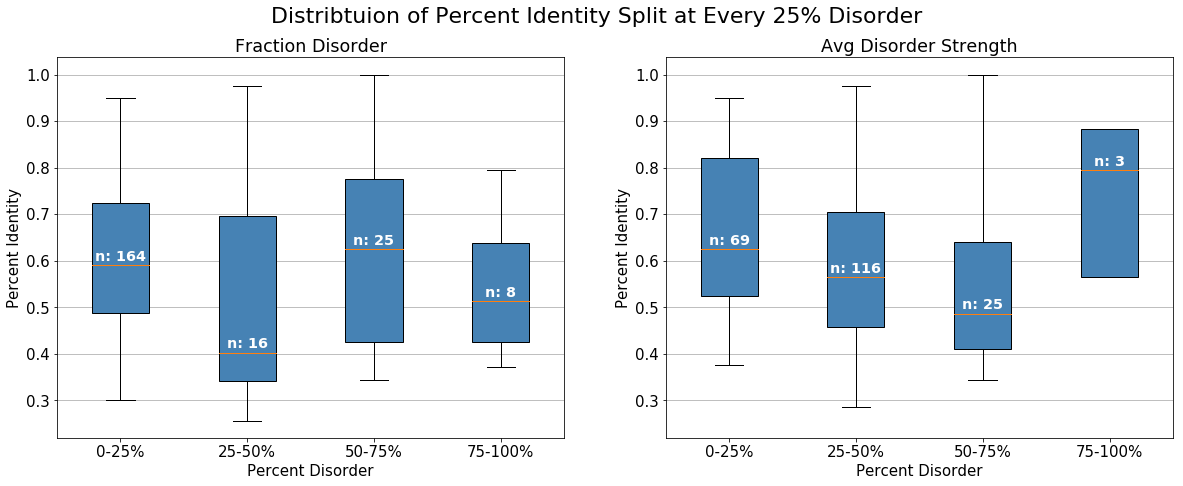

In [52]:
plot_boxplots("Percent Identity")